# Homework 3: K-Means & GMM (Gaussian Mixture Model)
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Soru 1

<div>
  <input type="checkbox" checked>
  <label>GMM’in algoritmasını ve denklemlerini yazarak detaylıca paylaşınız.</label>
</div>

## Gaussian Mixture Model
> A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. [1]


> In statistics, a **normal distribution** or **Gaussian distribution** is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is
>
> \begin{equation} p\left(x \mid \mu, \sigma^{2}\right)= \mathcal{N}\left(\mu, \sigma^{2}\right) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right). \end{equation}
> 
> The parameter $\mu$  is the mean or expectation of the distribution (and also its median and mode), while the parameter $\sigma$ is its standard deviation. The variance of the distribution is $\sigma ^{2}$. [3]

> Likelihood of a Gaussian
> 
> \begin{equation} p(\mathcal{X} \vert \mu) =\prod_{n=1}^{N} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{n}-\mu\right)^{2}}{2 \sigma^{2}}, \end{equation}
> 
> \begin{equation} \mathcal{L} = \log p(\mathcal{X} \vert \mu) =\sum_{n=1}^{N}\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\left(x_{n}-\mu\right)^{2}}{2 \sigma^{2}}\right], \end{equation}
> 
> \begin{equation} \frac{d \mathcal{L}}{d \mu}  =\sum_{n=1}^{N} \frac{x_{n}-\mu}{\sigma^{2}}. \end{equation} [9]

> Gaussian Mixture Models (GMMs)
> 
> \begin{equation} p(x \mid \boldsymbol{\theta})=\sum_{z} p(x \mid \boldsymbol{\theta}, z) p(z \mid \boldsymbol{\theta}) \end{equation} [9]

> \begin{equation} \mathcal{N}\left(\mu_{k}, \sigma_{k} \right) = \sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x \mid \mu_{k}, \sigma_{k}\right) \quad \text{where} \end{equation} [9]

\begin{equation} 0 \leqslant \pi_{k} \leqslant 1, \quad \sum_{k=1}^{K} \pi_{k}=1 \quad \text{and} \quad \boldsymbol{\theta}=\left\{\mu_{k}, \sigma_{k}, \pi_{k} \right\}_{k=1}^{K} \end{equation} [9]

Similarly we can define a GMM for the multivariate case:  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow class="MJX-TeXAtom-ORD">
    <mi class="MJX-tex-caligraphic" mathvariant="script">N</mi>
  </mrow>
  <mrow>
    <mo>(</mo>
    <mrow>
      <msub>
        <mi mathvariant="bold-italic">&#x03BC;<!-- μ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>k</mi>
        </mrow>
      </msub>
      <mo>,</mo>
      <msub>
        <mi mathvariant="bold">&#x03A3;<!-- Σ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>k</mi>
        </mrow>
      </msub>
    </mrow>
    <mo>)</mo>
  </mrow>
  <mo>=</mo>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>k</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>K</mi>
    </mrow>
  </munderover>
  <msub>
    <mi>&#x03C0;<!-- π --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>k</mi>
    </mrow>
  </msub>
  <mrow class="MJX-TeXAtom-ORD">
    <mi class="MJX-tex-caligraphic" mathvariant="script">N</mi>
  </mrow>
  <mrow>
    <mo>(</mo>
    <mrow>
      <mi mathvariant="bold-italic">x</mi>
      <mo>&#x2223;<!-- ∣ --></mo>
      <msub>
        <mi mathvariant="bold-italic">&#x03BC;<!-- μ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>k</mi>
        </mrow>
      </msub>
      <mo>,</mo>
      <msub>
        <mi mathvariant="bold">&#x03A3;<!-- Σ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>k</mi>
        </mrow>
      </msub>
    </mrow>
    <mo>)</mo>
  </mrow>
</math>

[9]

# Soru 2

<div>
  <input type="checkbox" checked>
  <label>K-Ortalamalar yöntemlerinin algoritmalarını yazarak karşılaştırınız. Karşılaştırmada kullanılan eşitlikleri paylaşarak olasılık dersimiz açısından inceleyiniz. Buna göre, GMM, K-Ortalamalar yöntemindeki hangi sorunlara nasıl çözüm sağlamaktadır?</label>
</div>
  
  
> The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.
> 
> The k-means algorithm divides a set of **N** samples **X** into **K** disjoint clusters **C**, each described by the mean **mu_j**  of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from **X**, although they live in the same space.
> 
> The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion:** [2]
> 
> $$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$


> K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. 
> * The first step chooses the initial centroids, with the most basic method being to choose **k** samples from the dataset **X**. After initialization, K-means consists of looping between the two other steps.
> * The first step assigns each sample to its nearest centroid.
> * The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly. [2]

## GMM vs K-Means
> KMeans uses a distance-based approach, and GMM uses a probabilistic approach. There is one primary assumption in GMM: the dataset consists of multiple Gaussians, in other words, a mixture of the gaussian. [7]

> In summary, KMeans have below limitations,
> * It assumed that the clusters were spherical and equally sized, which is not valid in most real-world scenarios.
> * It's a hard clustering method. Meaning each data point is assigned to a single cluster. [7]

# Soru 3

<div>
  <input type="checkbox" checked>
  <label>Aşağıda parametreleri paylaşılan çok değişkenli Gauss dağılımı kullanarak 10000 örnek içeren veriler üretiniz ve scatter çizimi olarak yukarıdaki gibi çizdiriniz. Burada, iki küme sayısı varsayımı ile veri oluşturulmaktadır.</label>
</div>

a) μ 1 = [2, 1], μ2 = [2, −1], Σ1 = Σ2 = [2, −1; −1 , 1],  
b) μ 1 = [2, 1], μ2 = [−2, −1], Σ1 = [2, −1; −1 , 1], , Σ2 = [2, 2; 2 , 3]


\begin{equation}
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{\left({x - \mu} \right)^2}{2 \sigma^2}}
\end{equation}

A şıkkı için:  
Verilen ortalamalar ve kovaryans matrisi ile 10000 örnek üretildi.

In [297]:
mean_mu_list_1 = [2, 1]
mean_mu_list_2 = [2, -1]

covariance_matrix_list_1_2 = [[2, -1], [-1, 1]]

n_samples = 5000

rng = np.random.default_rng()
data_gaussian_dist_1 = rng.multivariate_normal(mean_mu_list_1, covariance_matrix_list_1_2, size=n_samples, check_valid='raise', tol=1e-8)
data_gaussian_dist_2 = rng.multivariate_normal(mean_mu_list_2, covariance_matrix_list_1_2, size=n_samples, check_valid='raise', tol=1e-8)


 * Üretilen örneklerin ortalama ve kovaryans değerlerinin başlangıçta verilen değerlere çok yakın olduğu görüldü.

In [298]:
# This values must be so close to each other
print("Expected mean: ", mean_mu_list_1)
print("Generated data mean: ", data_gaussian_dist_1.mean(axis=0))
print()

# This values must be so close to each other
print("Expected covariance matrix: ", covariance_matrix_list_1_2)
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_1.T))
print()

# This values must be so close to each other
print("Expected mean: ", mean_mu_list_2)
print("Generated data mean: ", data_gaussian_dist_2.mean(axis=0))
print()

# This values must be so close to each other
print("Expected covariance matrix: ", covariance_matrix_list_1_2)
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_2.T))
print()


Expected mean:  [2, 1]
Generated data mean:  [1.9874389  1.01451182]

Expected covariance matrix:  [[2, -1], [-1, 1]]
Generated data covariance matrix:  [[ 1.97855571 -1.00201153]
 [-1.00201153  1.00208439]]

Expected mean:  [2, -1]
Generated data mean:  [ 1.99191852 -0.98880699]

Expected covariance matrix:  [[2, -1], [-1, 1]]
Generated data covariance matrix:  [[ 1.98613384 -0.99004451]
 [-0.99004451  0.99032591]]



* Scatter plot ları çizildi.

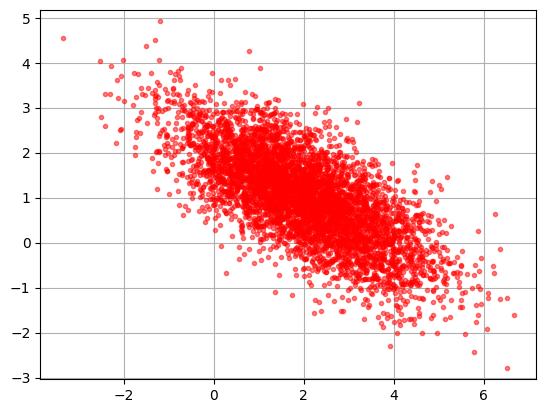

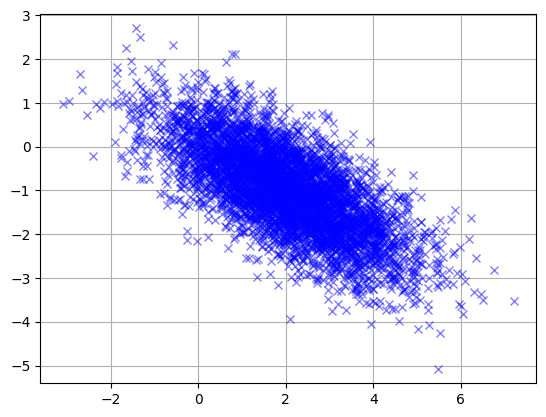

/tmp/ipykernel_23979/1821899928.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_1, hist=False, rug=True, color='red')
/tmp/ipykernel_23979/1821899928.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_2, hist=False, rug=True, color='

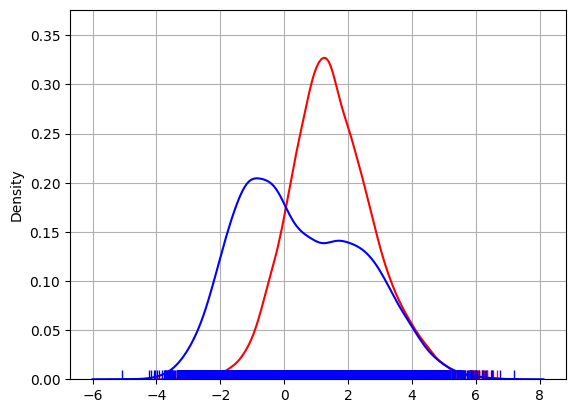

In [299]:
plt.plot(data_gaussian_dist_1[:, 0], data_gaussian_dist_1[:, 1], '.', color='red', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

plt.plot(data_gaussian_dist_2[:, 0], data_gaussian_dist_2[:, 1], 'x', color='blue', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

sns.distplot(data_gaussian_dist_1, hist=False, rug=True, color='red')
sns.distplot(data_gaussian_dist_2, hist=False, rug=True, color='blue')
plt.grid()
plt.show()


* 2 küme birleştirilerek tek küme elde edildi.  
* Bunun scatter plot u çizildi.

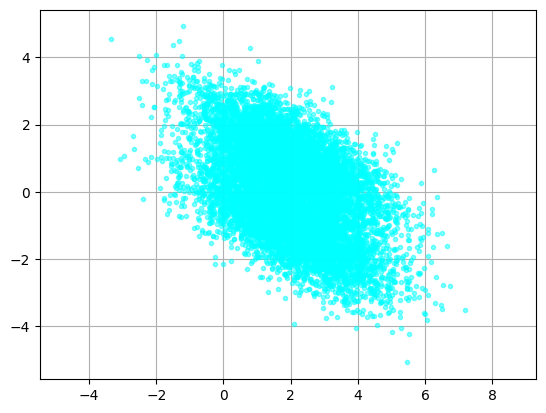

/tmp/ipykernel_23979/4191622232.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_a_merged, hist=False, rug=True, color='cyan')


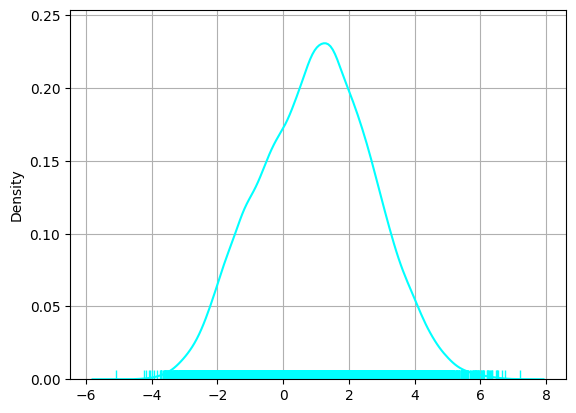

In [300]:
data_gaussian_dist_a_merged = np.concatenate((data_gaussian_dist_1, data_gaussian_dist_2), axis=0)

plt.plot(data_gaussian_dist_a_merged[:, 0], data_gaussian_dist_a_merged[:, 1], '.', color='cyan', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

sns.distplot(data_gaussian_dist_a_merged, hist=False, rug=True, color='cyan')
plt.grid()
plt.show()


B şıkkı için:  
Verilen ortalamalar ve kovaryans matrisi ile 10000 örnek üretildi.

In [301]:
mean_mu_list_3 = [2, 1]
mean_mu_list_4 = [-2, -1]

covariance_matrix_list_3 = [[2, -1], [-1, 1]]
covariance_matrix_list_4 = [[2, 2], [2, 3]]

n_samples = 5000

rng = np.random.default_rng()
data_gaussian_dist_3 = rng.multivariate_normal(mean_mu_list_3, covariance_matrix_list_3, size=n_samples, check_valid='raise', tol=1e-8)
data_gaussian_dist_4 = rng.multivariate_normal(mean_mu_list_4, covariance_matrix_list_4, size=n_samples, check_valid='raise', tol=1e-8)


 * Üretilen örneklerin ortalama ve kovaryans değerlerinin başlangıçta verilen değerlere çok yakın olduğu görüldü.

In [302]:
# This values must be so close to each other
print("Expected mean: ", mean_mu_list_3)
print("Generated data mean: ", data_gaussian_dist_3.mean(axis=0))
print()

# This values must be so close to each other
print("Expected covariance matrix: ", covariance_matrix_list_3)
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_3.T))
print()

# This values must be so close to each other
print("Expected mean: ", mean_mu_list_4)
print("Generated data mean: ", data_gaussian_dist_4.mean(axis=0))
print()

# This values must be so close to each other
print("Expected covariance matrix: ", covariance_matrix_list_4)
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_4.T))
print()


Expected mean:  [2, 1]
Generated data mean:  [1.96843046 1.01318818]

Expected covariance matrix:  [[2, -1], [-1, 1]]
Generated data covariance matrix:  [[ 1.98380396 -0.99042379]
 [-0.99042379  0.99386516]]

Expected mean:  [-2, -1]
Generated data mean:  [-2.00666794 -1.02508441]

Expected covariance matrix:  [[2, 2], [2, 3]]
Generated data covariance matrix:  [[1.93305563 1.94300515]
 [1.94300515 2.90891471]]



* Scatter plot ları çizildi.

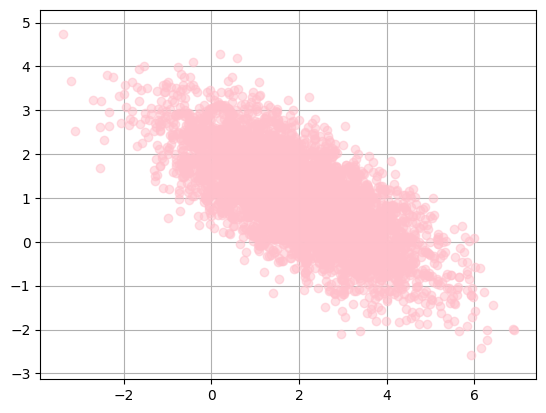

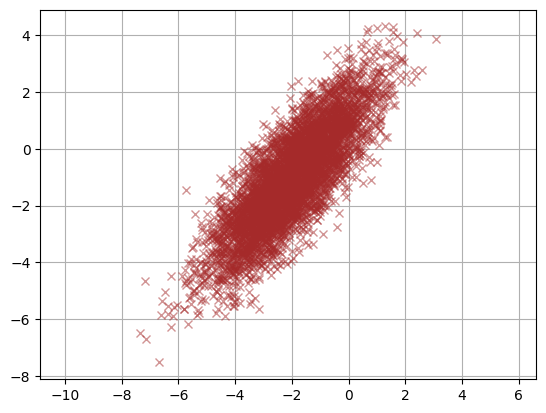

/tmp/ipykernel_23979/2462040615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_3, hist=False, rug=True, color='pink')
/tmp/ipykernel_23979/2462040615.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_4, hist=False, rug=True, color=

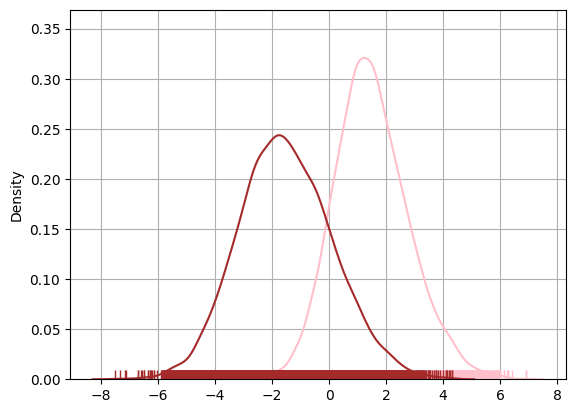

In [303]:
plt.plot(data_gaussian_dist_3[:, 0], data_gaussian_dist_3[:, 1], 'o', color='pink', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

plt.plot(data_gaussian_dist_4[:, 0], data_gaussian_dist_4[:, 1], 'x', color='brown', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

sns.distplot(data_gaussian_dist_3, hist=False, rug=True, color='pink')
sns.distplot(data_gaussian_dist_4, hist=False, rug=True, color='brown')
plt.grid()
plt.show()


* 2 küme birleştirilerek tek küme elde edildi.  
* Bunun scatter plot u çizildi.
* Burada yapılan çizimden anlaşılacağı üzere iki küme birbirine çapraz olduğu için en sonda elde edilen kümelemede 2 farklı küme olarak görünecektir.

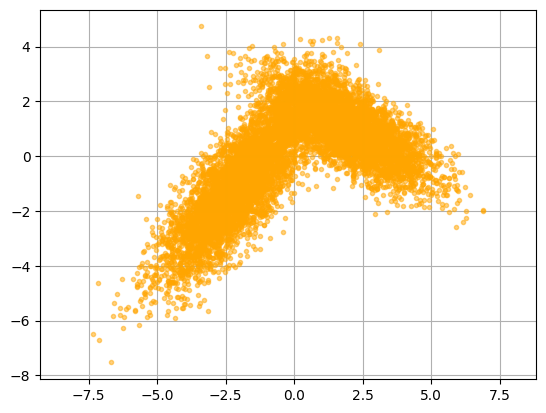

/tmp/ipykernel_23979/1875324300.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_gaussian_dist_b_merged, hist=False, rug=True, color='orange')


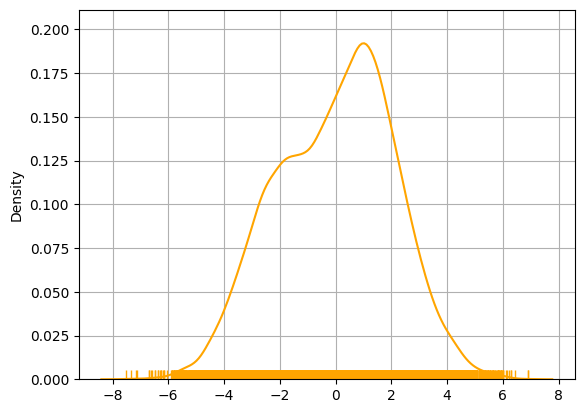

In [304]:
data_gaussian_dist_b_merged = np.concatenate((data_gaussian_dist_3, data_gaussian_dist_4), axis=0)

plt.plot(data_gaussian_dist_b_merged[:, 0], data_gaussian_dist_b_merged[:, 1], '.', color='orange', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

sns.distplot(data_gaussian_dist_b_merged, hist=False, rug=True, color='orange')
plt.grid()
plt.show()


# Soru 4

<div>
  <input type="checkbox" checked>
  <label>Yukarıda elde edilen her iki veri için de kovaryans ve varyans değerlerini ayrı ayrı yorumlayınız.</label>
</div>

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

A şıkkında kullanılan mean değerleri:  
* μ1 = [2, 1], μ2 = [2, −1] olduğu için,  
* İlk eksen için (2 + 2) / 2 = 2, ikinci eksen için (1 + (-1)) / 2 = 0 olacaktır.
* Birleştirilen kümenin ortalama değeri: [2, 0] ye yakın bir değer olacaktır.

In [305]:
print("Generated data mean: ", data_gaussian_dist_a_merged.mean(axis=0))
print()


Generated data mean:  [1.98967871 0.01285242]



A şıkkında kullanılan covariance değerleri:  
* Σ 1 = Σ2 = [2, −1; −1 , 1] olduğu için,
* Birleştirilen kümenin kovaryans değeri: [2, −1; −1 , 1] e yakın bir değer olacaktır.

In [306]:
# This values must be so close to each other
print("Expected covariance matrix: ", covariance_matrix_list_1_2)
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_a_merged.T))
print()


Expected covariance matrix:  [[2, -1], [-1, 1]]
Generated data covariance matrix:  [[ 1.98215154 -0.99817216]
 [-0.99817216  1.99952743]]



B şıkkında kullanılan mean değerleri:  
* μ1 = [2, 1], μ2 = [−2, −1] olduğu için,  
* İlk eksen için (2 + (-2)) / 2 = 0, ikinci eksen için (1 + (-1)) / 2 = 0 olacaktır.
* Birleştirilen kümenin ortalama değeri: [0, 0] a yakın bir değer olacaktır.

In [307]:
print("Generated data mean: ", data_gaussian_dist_b_merged.mean(axis=0))
print()


Generated data mean:  [-0.01911874 -0.00594812]



B şıkkında kullanılan covariance değerleri:  
* Σ1 = [2, −1; −1 , 1], Σ2 = [2, 2; 2 , 3] olduğu için,

In [308]:
print("Generated data covariance matrix: ", np.cov(data_gaussian_dist_b_merged.T))
print()


Generated data covariance matrix:  [[5.90898082 2.50202916]
 [2.50202916 2.98993744]]



# Soru 5

<div>
  <input type="checkbox" checked>
  <label>Elde edilen veriler için K-Ortalamalar ve GMM yöntemlerini eşit şartlar altında çalıştırarak sonuçlarını karşılaştırınız. Sonuçlarını olasılıksal açıdan yorumlayınız.</label>
</div>


* data_gaussian_dist_a_merged için K-Ortalamalar ve GMM yöntemlerini eşit şartlar altında çalıştırıldı.
* Aşağıda görüldüğü üzere 1 ile 4 küme arası yapılan çalışmada verilerin ayrılma noktası aslında 2 farklı gauss dağılımından gelen noktayı temsil **etmemektedir**.
* 2 kümeli çizimde merkez noktaları yani mean in denk geldiği yerler 1.5 ile 2.5 değerlerine denk gelmektedir.
* Normalde bu noktalar başlangıçta verilen ortalama değerleri civarında yani μ1 = [2, 1], μ2 = [2, −1] değerlerine yakın olması gerekiyordu.
* 2 ve 3 kümeli çizimlere bakarsak K-Means ve GMM kümelenmelerinin bittiği, diğer kümenin başladığı yerler birbirine çaprazımsı bir yayılım göstermektedir.

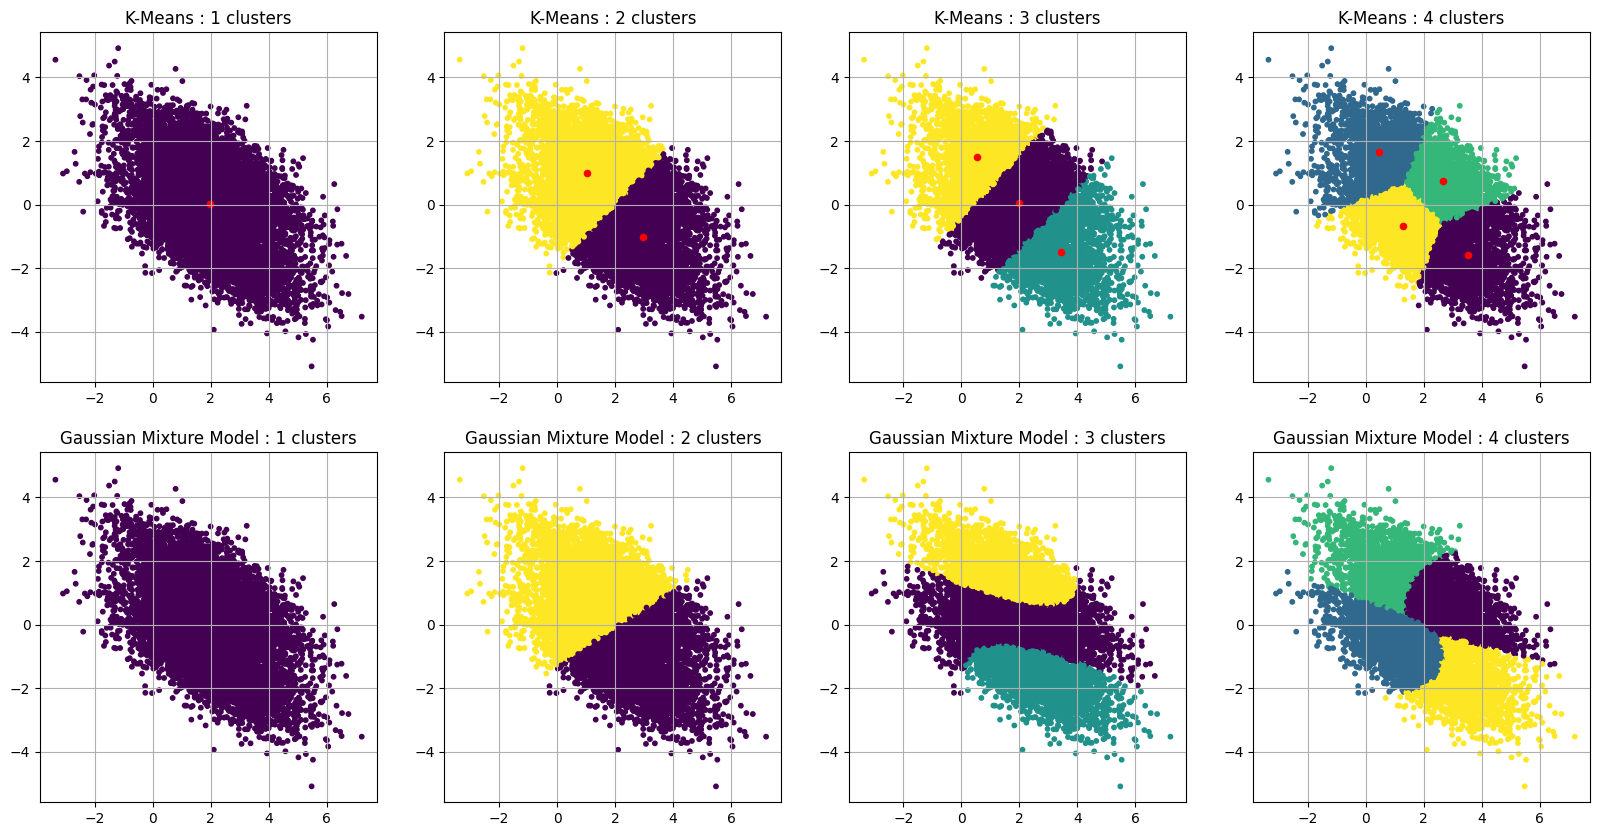

In [309]:
# Number of cluster centers for KMeans and GaussianMixture
n_clusters_list = [1, 2, 3, 4]

# Algorithms to compare
clustering_algorithms = {
    "K-Means": KMeans,
    "Gaussian Mixture Model": GaussianMixture,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(20, 10)
)

axs = axs.T
random_state=0

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        

        if (Algorithm == KMeans):
            algo = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=3)
            algo.fit(data_gaussian_dist_a_merged)

            centers = algo.cluster_centers_
            axs[j, i].scatter(data_gaussian_dist_a_merged[:, 0], data_gaussian_dist_a_merged[:, 1], s=10, c=algo.labels_)
            axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        if (Algorithm == GaussianMixture):
            algo = GaussianMixture(n_components=n_clusters, random_state=random_state, n_init=3)
            data_gaussian_dist_a_merged_pred = algo.fit_predict(data_gaussian_dist_a_merged)
            
            axs[j, i].scatter(data_gaussian_dist_a_merged[:, 0], data_gaussian_dist_a_merged[:, 1], s=10, c=data_gaussian_dist_a_merged_pred)
            # TODO: Calculate centers axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

for ax in axs.flat:
    ax.grid()
plt.show()


* data_gaussian_dist_b_merged için K-Ortalamalar ve GMM yöntemlerini eşit şartlar altında çalıştırıldı.
* Aşağıda görüldüğü üzere 1 ile 4 küme arası yapılan çalışmada verilerin ayrılma noktası aslında 2 farklı gauss dağılımından gelen noktayı temsil **etmektedir**.
* 2 kümeli çizimde **K-Means yönteminde en üstte yer alan noktalar sarı** ile gösterilen 2. cluster a aitmiş gibi görünürken, **GMM yönteminde en üstte yer alan noktalar mor** ile gösterilen 1. cluster a aitmiş gibi görünmektedir. Bu da GMM yönteminin daha iyi bir sonuç verdiğini göstermektedir. Çünkü başlangıçta birleştirmeden önceki gauss dağılımlarında yukarıda kalan datalar 1. kümeye (mor) aitti.
* 2 kümeli çizim için elde edilen orta noktalar -2 ile 2 noktalarına yakındır. Bu da başlangıçta verilen ortalama değerlerine  μ1 = [2, 1], μ2 = [−2, −1] yakın olduğunu göstermektedir.

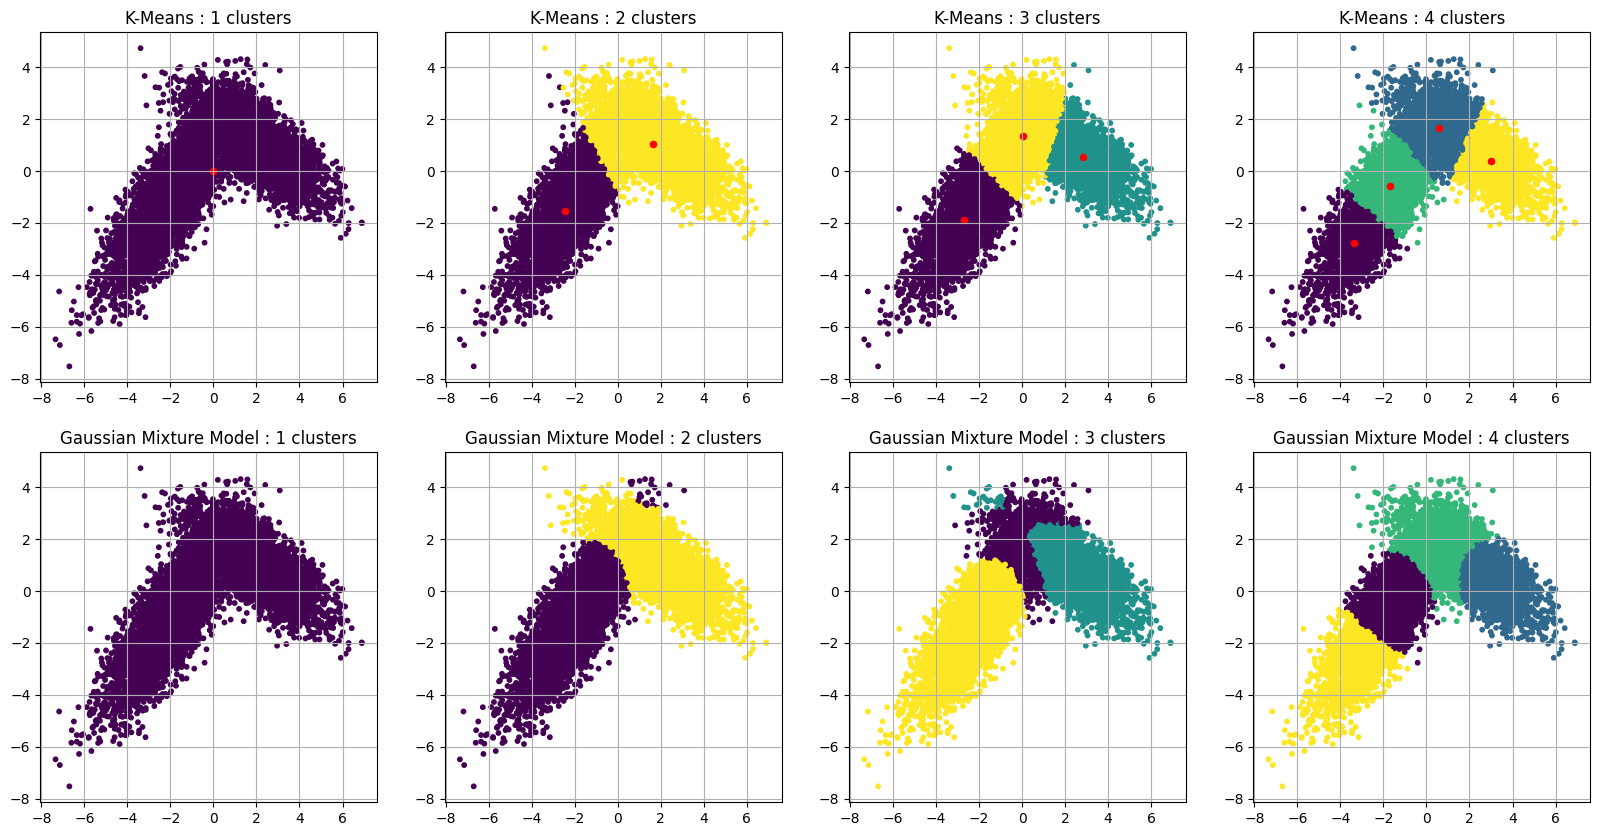

In [310]:
# Number of cluster centers for KMeans and GaussianMixture
n_clusters_list = [1, 2, 3, 4]

# Algorithms to compare
clustering_algorithms = {
    "K-Means": KMeans,
    "Gaussian Mixture Model": GaussianMixture,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(20, 10)
)

axs = axs.T
random_state=0

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        

        if (Algorithm == KMeans):
            algo = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=3)
            algo.fit(data_gaussian_dist_b_merged)

            centers = algo.cluster_centers_
            axs[j, i].scatter(data_gaussian_dist_b_merged[:, 0], data_gaussian_dist_b_merged[:, 1], s=10, c=algo.labels_)
            axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        if (Algorithm == GaussianMixture):
            algo = GaussianMixture(n_components=n_clusters, random_state=random_state, n_init=3)
            data_gaussian_dist_b_merged_pred = algo.fit_predict(data_gaussian_dist_b_merged)
            
            axs[j, i].scatter(data_gaussian_dist_b_merged[:, 0], data_gaussian_dist_b_merged[:, 1], s=10, c=data_gaussian_dist_b_merged_pred)
            # TODO: Calculate centers axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

for ax in axs.flat:
    ax.grid()
plt.show()


# Sonuçlar
* GMM yöntemi cluster ların yayılım eğrisini dikkate alarak verinin hangi kümeye ait olduğunu daha doğru bir şekilde göstermektedir.
* K-Means ve GMM yöntemlerinin başarımları ve kümeleme kestirimleri verinin dağılımına göre değişmektedir.

# Referanslar

* [1] [Gaussian mixture models](https://scikit-learn.org/stable/modules/mixture.html)
* [2] [K-means](https://scikit-learn.org/stable/modules/clustering.html)
* [3] [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)
* [4] [Multivariate Normal (Gaussian) Distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html)
* [5] [Bisecting K-Means and Regular K-Means Performance Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_bisect_kmeans.html)
* [6] [GaussianMixture](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#possible-solutions)
* [7] [How Gaussian Mixture Model (GMM) algorithm works](https://towardsdatascience.com/gaussian-mixture-model-clearly-explained-115010f7d4cf)
* [9] [An overview of Gaussian Mixture Models](https://mpatacchiola.github.io/blog/2020/07/31/gaussian-mixture-models.html)